In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 2. Set the file paths (update these with your actual paths)
train_path = '/content/drive/MyDrive/mave3ick-tigers/train_gpt_synthetic.xlsx'
test_path  = '/content/drive/MyDrive/mave3ick-tigers/test_data_original.xlsx'


In [ ]:
train_df = pd.read_excel(train_path)
test_df  = pd.read_excel(test_path)

In [ ]:
date_time = pd.to_datetime(train_df['QuoteDate'])
train_df['day'] = date_time.dt.day_name()
train_df['month'] = date_time.dt.month_name()

In [ ]:
train_df

,QuoteDate,ProductCategory,ProductPrice,QuoteAmount,ConvertedToSale,Discount,Channel,CustomerAge,Region,PreQuoteVisits,PaymentMethod,day,month
0,2024-03-30,Outdoor,281.61,264.72,0,0.06,Social,64,Georgia,8,Bank Transfer,Saturday,March
1,2025-06-28,Outdoor,373.30,332.24,0,0.11,Email,38,Mississippi,2,Bank Transfer,Saturday,June
2,2024-05-09,Apparel,165.25,138.81,1,0.16,App,67,New Jersey,1,Credit Card,Thursday,May
3,2025-06-13,Beauty,330.29,290.66,0,0.12,Social,58,Wisconsin,9,Credit Card,Friday,June
4,2024-08-23,Apparel,373.33,354.67,0,0.05,Web,40,Alabama,0,Bank Transfer,Friday,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-09-02,Books,290.03,272.62,0,0.06,Social,47,South Dakota,5,GifT Card,Monday,September
9996,2025-06-03,Books,96.21,94.29,1,0.02,Referral,48,Virginia,10,PayPal,Tuesday,June
9997,2024-09-05,Outdoor,363.11,315.90,1,0.13,Referral,70,Yew York,10,PayPal,Thursday,September
9998,2024-04-07,Apparel,286.63,266.57,0,0.07,Web,62,Colorado,7,Credit Card,Sunday,April


In [ ]:
test_df

,QuoteDate,ProductCategory,ProductPrice,QuoteAmount,ConvertedToSale,Discount,Channel,CustomerAge,Region,PreQuoteVisits,PaymentMethod,day,month
0,2025-07-01,Apparel,69.80,62.82,0,0.10,App,29,California,3,PayPal,Tuesday,July
1,2025-07-18,Beauty,89.00,75.65,1,0.15,App,49,Illinois,8,PayPal,Friday,July
2,2025-05-09,Outdoor,420.99,420.99,0,0.00,Web,42,Nevada,1,Credit Card,Friday,May
3,2025-07-12,Apparel,25.50,25.50,0,0.00,Referral,46,Oregon,9,Gift Card,Saturday,July
4,2025-06-26,Home,377.25,339.53,0,0.10,App,61,Michigan,4,Bank Transfer,Thursday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2025-07-10,Books,22.00,19.80,0,0.10,Referral,38,Illinois,6,Credit Card,Thursday,July
995,2025-06-05,Home,300.00,270.00,0,0.10,App,35,Ohio,5,PayPal,Thursday,June
996,2025-05-01,Electronics,180.00,162.00,0,0.10,Web,42,California,3,Gift Card,Thursday,May
997,2025-07-02,Apparel,75.00,67.50,0,0.10,App,40,Florida,7,Bank Transfer,Wednesday,July


In [ ]:
# If your DataFrame is named df
columns_list = train_df.columns.tolist()
print(columns_list)

['QuoteDate', 'ProductCategory', 'ProductPrice', 'QuoteAmount', 'ConvertedToSale', 'Discount', 'Channel', 'CustomerAge', 'Region', 'PreQuoteVisits', 'PaymentMethod', 'day', 'month']


In [ ]:
train_df.head()

,QuoteDate,ProductCategory,ProductPrice,QuoteAmount,ConvertedToSale,Discount,Channel,CustomerAge,Region,PreQuoteVisits,PaymentMethod,day,month
0,2024-03-30,Outdoor,281.61,264.72,0,0.06,Social,64,Georgia,8,Bank Transfer,Saturday,March
1,2025-06-28,Outdoor,373.30,332.24,0,0.11,Email,38,Mississippi,2,Bank Transfer,Saturday,June
2,2024-05-09,Apparel,165.25,138.81,1,0.16,App,67,New Jersey,1,Credit Card,Thursday,May
3,2025-06-13,Beauty,330.29,290.66,0,0.12,Social,58,Wisconsin,9,Credit Card,Friday,June
4,2024-08-23,Apparel,373.33,354.67,0,0.05,Web,40,Alabama,0,Bank Transfer,Friday,August


In [ ]:
drop_cols = ["QuoteDate"]
train_df = train_df.drop(columns=drop_cols)
test_df  = test_df.drop(columns=drop_cols)

In [ ]:
target_col = "ConvertedToSale"

In [ ]:
X_test_non_en = test_df.drop(columns=[target_col])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
cat_cols = train_df.select_dtypes(include=["object"]).columns

# Initialize OneHotEncoder (new API)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform
train_encoded = pd.DataFrame(ohe.fit_transform(train_df[cat_cols]), index=train_df.index)
test_encoded = pd.DataFrame(ohe.transform(test_df[cat_cols]), index=test_df.index)

# Add column names
train_encoded.columns = ohe.get_feature_names_out(cat_cols)
test_encoded.columns = ohe.get_feature_names_out(cat_cols)

# Merge with non-categorical data
train_df = pd.concat([train_df.drop(columns=cat_cols), train_encoded], axis=1)
test_df = pd.concat([test_df.drop(columns=cat_cols), test_encoded], axis=1)

In [ ]:
target_col = "ConvertedToSale"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test  = test_df.drop(columns=[target_col])
y_test  = test_df[target_col]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.25125125125125125

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.23      0.37       959
           1       0.04      0.75      0.07        40

    accuracy                           0.25       999
   macro avg       0.50      0.49      0.22       999
weighted avg       0.92      0.25      0.36       999


Confusion Matrix:
 [[221 738]
 [ 10  30]]


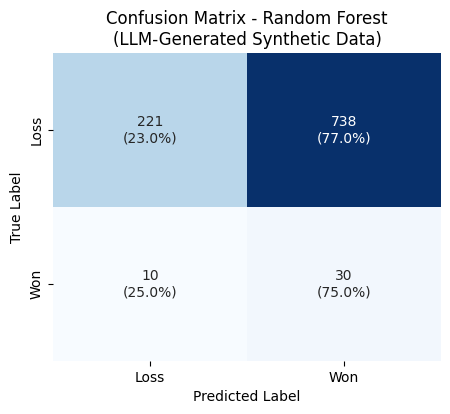

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Combine counts and percentages
cm_labels = np.array([f"{count}\n({perc:.1%})"
                      for count, perc in zip(cm.flatten(), cm_norm.flatten())]).reshape(cm.shape)

# Class labels
labels = ['Loss', 'Won']

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest\n(LLM-Generated Synthetic Data)')
plt.show()

In [ ]:
X_test.shape

(999, 84)

In [ ]:
X_train.shape

(10000, 84)

In [ ]:
y_train.shape

(10000,)

In [ ]:
y_test

,ConvertedToSale
0,0
1,1
2,0
3,0
4,0
...,...
994,0
995,0
996,0
997,0


In [ ]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import f1_score

# Macro F1-score (average of F1 for each class)
f1_macro = f1_score(y_test, y_pred, average='macro')

# Weighted F1-score (weighted by class support)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("Macro F1-score:", f1_macro)
print("Weighted F1-score:", f1_weighted)

Macro F1-score: 0.22284299858557285
Weighted F1-score: 0.35952982685655954


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.26926926926926925

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.25      0.40       959
           1       0.04      0.70      0.07        40

    accuracy                           0.27       999
   macro avg       0.50      0.48      0.23       999
weighted avg       0.92      0.27      0.38       999


Confusion Matrix:
 [[241 718]
 [ 12  28]]


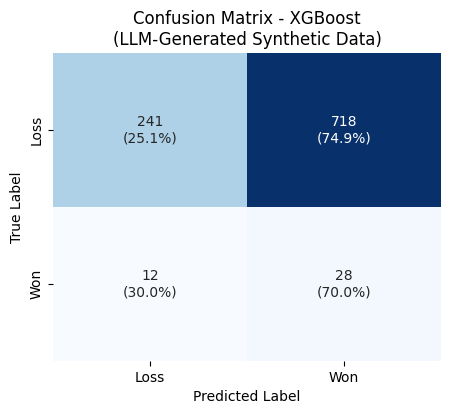

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Combine counts and percentages
cm_labels = np.array([f"{count}\n({perc:.1%})"
                      for count, perc in zip(cm.flatten(), cm_norm.flatten())]).reshape(cm.shape)

labels = ['Loss', 'Won']

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost\n(LLM-Generated Synthetic Data)')
plt.show()

In [ ]:
# Get predicted values
y_pred_xgb2 = xgb_model.predict(X_test)

# True positives (predicted 1, actual 1)
won_rows = test_df[(y_test == 1) & (y_pred_xgb == 1)]

print(won_rows)
print("Number of true positive 'Won' rows:", len(won_rows))

     ProductPrice  QuoteAmount  ConvertedToSale  Discount  CustomerAge  \
1           89.00        75.65                1      0.15           49   
6           59.99        53.99                1      0.10           32   
9           65.99        59.39                1      0.10           46   
28          55.00        46.75                1      0.15           29   
57          62.99        59.84                1      0.05           34   
63          98.99        84.14                1      0.15           38   
67          64.00        54.40                1      0.15           38   
73          54.90        46.67                1      0.15           30   
79         115.00       103.50                1      0.10           22   
94          14.50        12.33                1      0.15           39   
111        499.00       424.15                1      0.15           52   
121        198.00       168.30                1      0.15           36   
128         88.20        79.38        

In [ ]:
# List of correct row indexes
correct_idx = [57, 86, 133, 328, 346, 408, 928, 967]

# Get those rows from X_test
correct_rows = X_test_non_en.loc[correct_idx]

print(correct_rows)

    ProductCategory  ProductPrice  QuoteAmount  Discount   Channel  \
57          Apparel         62.99        59.84      0.05  Referral   
86          Outdoor         87.45        78.71      0.10    Social   
133     Electronics         78.00        62.40      0.20  Referral   
328     Electronics        210.00       178.50      0.15    Social   
346         Outdoor         95.00        85.50      0.10       App   
408     Electronics        197.00       177.30      0.10       App   
928         Outdoor         95.00        80.75      0.15       Web   
967     Electronics        199.00       169.15      0.15       Web   

     CustomerAge      Region  PreQuoteVisits  PaymentMethod        day  month  
57            34    Missouri               2  Bank Transfer  Wednesday    May  
86            27  California               4      Gift Card   Thursday    May  
133           46      Oregon               2      Gift Card  Wednesday    May  
328           40     Florida               3     